<a href="https://colab.research.google.com/github/naiilard/Hermite-Integrator/blob/main/Hermite_Integrator2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

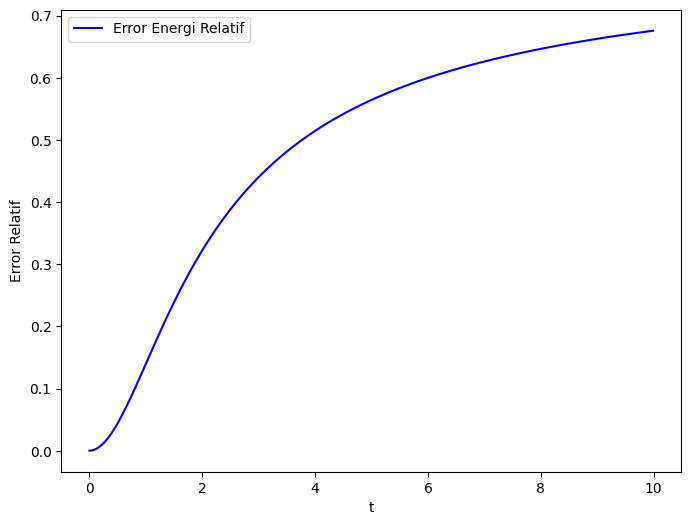

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Konstanta Gravitasi
G = 1.0

# Massa benda
m1 = m2 = m3 = 1.0

# Definisikan posisi awal
r1 = np.array([np.cos(0), np.sin(0)])
r2 = np.array([np.cos(2 * np.pi / 3), np.sin(2 * np.pi / 3)])
r3 = np.array([np.cos(4 * np.pi / 3), np.sin(4 * np.pi / 3)])

# Definisikan kecepatan awal
v1 = np.array([-np.sin(0), np.cos(0)])
v2 = np.array([-np.sin(2 * np.pi / 3), np.cos(2 * np.pi / 3)])
v3 = np.array([-np.sin(4 * np.pi / 3), np.cos(4 * np.pi / 3)])

# Langkah waktu
dt = 0.01

# Banyak langkah simulasi
n_langkah = 1000

# Fungsi menghitung percepatan dan jerk
def hitung_a_j(r1, r2, r3, v1, v2, v3, m1, m2, m3):
    # Hitung jarak antar benda
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    # Hitung percepatan
    a1 = G * m2 * (r2 - r1) / r12**3 + G * m3 * (r3 - r1) / r13**3
    a2 = G * m1 * (r1 - r2) / r12**3 + G * m3 * (r3 - r2) / r23**3
    a3 = G * m1 * (r1 - r3) / r13**3 + G * m2 * (r2 - r3) / r23**3

    # Hitung jerk
    j1 = G * m2 * (v2 - v1) / r12**3 - 3 * G * m2 * np.dot((v2 - v1), (r2 - r1)) * (r2 - r1) / r12**5
    j1 += G * m3 * (v3 - v1) / r13**3 - 3 * G * m3 * np.dot((v3 - v1), (r3 - r1)) * (r3 - r1) / r13**5
    j2 = G * m1 * (v1 - v2) / r12**3 - 3 * G * m1 * np.dot((v1 - v2), (r1 - r2)) * (r1 - r2) / r12**5
    j2 += G * m3 * (v3 - v2) / r23**3 - 3 * G * m3 * np.dot((v3 - v2), (r3 - r2)) * (r3 - r2) / r23**5
    j3 = G * m1 * (v1 - v3) / r13**3 - 3 * G * m1 * np.dot((v1 - v3), (r1 - r3)) * (r1 - r3) / r13**5
    j3 += G * m2 * (v2 - v3) / r23**3 - 3 * G * m2 * np.dot((v2 - v3), (r2 - r3)) * (r2 - r3) / r23**5

    return a1, a2, a3, j1, j2, j3

# Fungsi untuk menghitung energi total dan error relatif
def hitung_energi(r1, r2, r3, v1, v2, v3, m1, m2, m3):
    # Energi Kinetik
    K1 = 0.5 * m1 * np.dot(v1, v1)
    K2 = 0.5 * m2 * np.dot(v2, v2)
    K3 = 0.5 * m3 * np.dot(v3, v3)

    # Energi Potensial
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    U1 = -G * m1 * (m2 / r12 + m3 / r13)
    U2 = -G * m2 * (m1 / r12 + m3 / r23)
    U3 = -G * m3 * (m1 / r13 + m2 / r23)

    # Energi total
    E_total = K1 + K2 + K3 + U1 + U2 + U3

    return E_total

# Simulasi
energi_awal = hitung_energi(r1, r2, r3, v1, v2, v3, m1, m2, m3)
error_energi = []

# Langkah 1 menghitung percepatan
a1, a2, a3, j1, j2, j3 = hitung_a_j(r1, r2, r3, v1, v2, v3, m1, m2, m3)

# Simpan data untuk visualisasi
posisi_r1 = [r1.copy()]
posisi_r2 = [r2.copy()]
posisi_r3 = [r3.copy()]

# Simulasi
for _ in range(n_langkah):
    # Prediksi posisi
    r1_pred = r1 + v1 * dt + a1 * dt**2 / 2 + j1 * dt**3 / 6
    r2_pred = r2 + v2 * dt + a2 * dt**2 / 2 + j2 * dt**3 / 6
    r3_pred = r3 + v3 * dt + a3 * dt**2 / 2 + j3 * dt**3 / 6

    # Prediksi kecepatan
    v1_pred = v1 + a1 * dt + j1 * dt**2 / 2
    v2_pred = v2 + a2 * dt + j2 * dt**2 / 2
    v3_pred = v3 + a3 * dt + j3 * dt**2 / 2

    # Hitung percepatan dan jerk baru
    a1_new, a2_new, a3_new, j1_new, j2_new, j3_new = hitung_a_j(r1_pred, r2_pred, r3_pred, v1_pred, v2_pred, v3_pred, m1, m2, m3)

    # Koreksi posisi
    r1 += (v1 + v1_pred) * dt / 2 + (a1 - a1_new) * dt**2 / 12
    r2 += (v2 + v2_pred) * dt / 2 + (a2 - a2_new) * dt**2 / 12
    r3 += (v3 + v3_pred) * dt / 2 + (a3 - a3_new) * dt**2 / 12

    # Koreksi kecepatan
    v1 += (a1 + a1_new) * dt / 2 + (j1 - j1_new) * dt**2 / 12
    v2 += (a2 + a2_new) * dt / 2 + (j2 - j2_new) * dt**2 / 12
    v3 += (a3 + a3_new) * dt / 2 + (j3 - j3_new) * dt**2 / 12

    # Update percepatan dan jerk
    a1 = a1_new
    a2 = a2_new
    a3 = a3_new
    j1 = j1_new
    j2 = j2_new
    j3 = j3_new

    # Simpan data posisi untuk visualisasi
    posisi_r1.append(r1.copy())
    posisi_r2.append(r2.copy())
    posisi_r3.append(r3.copy())

    # Hitung energi dan error relatif
    E_total = hitung_energi(r1, r2, r3, v1, v2, v3, m1, m2, m3)
    error_energi.append(abs(E_total - energi_awal) / abs(energi_awal))

# Konversi posisi menjadi array numpy
posisi_r1 = np.array(posisi_r1)
posisi_r2 = np.array(posisi_r2)
posisi_r3 = np.array(posisi_r3)

# Plot error relatif energi
plt.figure(figsize=(8, 6))
plt.plot(np.arange(n_langkah) * dt, error_energi, label='Error Energi Relatif', color = 'blue')
plt.xlabel('t')
plt.ylabel('Error Relatif')
plt.legend()
plt.grid(False)
plt.show()

# Plot awal
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid(False)

lintasan1, = ax.plot([], [], 'r-', label='Lintasan Benda 1')
lintasan2, = ax.plot([], [], 'b-', label='Lintasan Benda 2')
lintasan3, = ax.plot([], [], 'g-', label='Lintasan Benda 3')

benda1, = ax.plot([], [], 'ro')
benda2, = ax.plot([], [], 'bo')
benda3, = ax.plot([], [], 'go')

ax.legend()

# Fungsi update animasi
def update(frame):
    lintasan1.set_data(posisi_r1[:frame, 0], posisi_r1[:frame, 1])
    lintasan2.set_data(posisi_r2[:frame, 0], posisi_r2[:frame, 1])
    lintasan3.set_data(posisi_r3[:frame, 0], posisi_r3[:frame, 1])

    # The following lines were changed to provide lists of coordinates instead of single coordinates.
    benda1.set_data([posisi_r1[frame, 0]], [posisi_r1[frame, 1]])
    benda2.set_data([posisi_r2[frame, 0]], [posisi_r2[frame, 1]])
    benda3.set_data([posisi_r3[frame, 0]], [posisi_r3[frame, 1]])

    return lintasan1, lintasan2, lintasan3, benda1, benda2, benda3

# Animasi
anim = FuncAnimation(fig, update, frames=n_langkah, interval=30, blit=True)
plt.close()

# Tampilkan animasi
HTML(anim.to_html5_video())